# BIG DATA: Práctica: Clasificación
### Cargar las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

### Generar los datos

In [2]:
mu        = 250
sigma     = 50
n_numbers = 500

data = (np.random.randn(n_numbers) * sigma + mu).astype('int')
times = data.tolist()

X  = np.arange(0,251)
df = pd.DataFrame(X, columns = ['X'])
df["y_true"] = 0

for i in times:
    if i <= 250:
        df['y_true'].iloc[i] = 1
        
X = df["X"].values
y = df["y_true"]

## El ajuste: Logistic Regression
[`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

$$\Large  \mathrm{logistic}(x):= \frac{1}{1+e^{-( \kappa_{1} x + \kappa_{0})}} $$


In [3]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(penalty='none')

classifier.fit(X.reshape(-1, 1), y)

# calcular las probabilidades
df["probability"]  = classifier.predict_proba(X.reshape(-1, 1))[:,1]

k1 = classifier.coef_[0]
k0 = classifier.intercept_

print("kappa_1 = ",k1) 
print("kappa_0 = ",k0)

kappa_1 =  [0.065339]
kappa_0 =  [-10.42416397]


también dibujar una regresión lineal a los datos de forma comparativa

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X.reshape(-1, 1), y)
y_lineal    = regressor.predict(X.reshape(-1, 1))

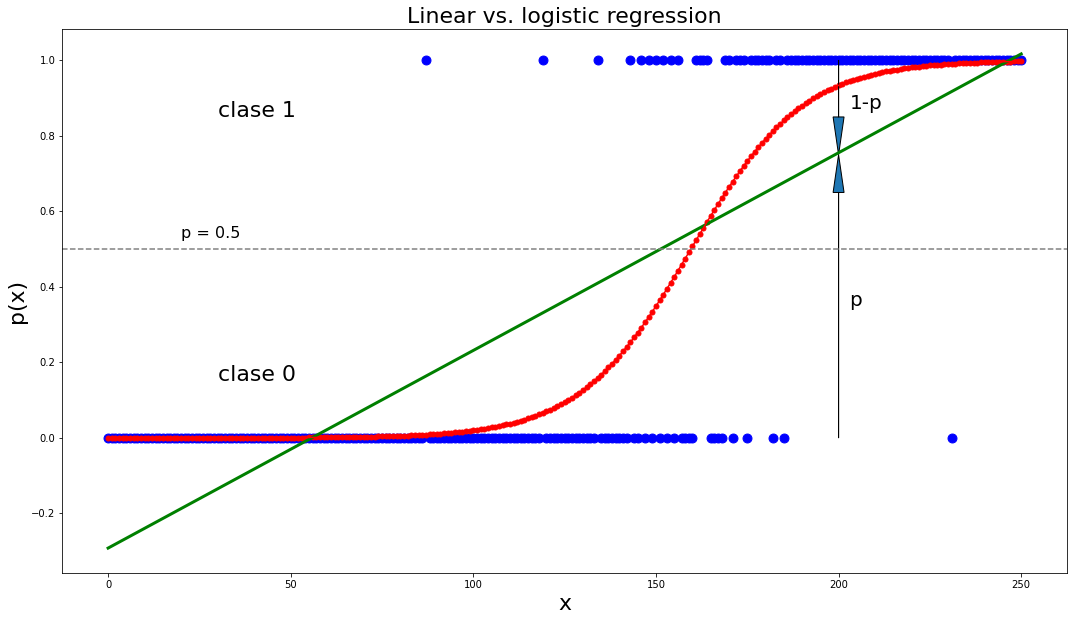

In [5]:
fig, ax = plt.subplots(figsize=(18, 10))

plt.scatter(df.X, df.y_true, color="blue", s=80)
plt.scatter(df.X, df.probability, color="red",s=25)
plt.plot(df.X, y_lineal, color="green", lw = 3)

def logistic(x):
    return 1/(1 + np.exp(-(k1*x + k0) ) )

df["logistic"] = df["X"].apply(logistic)
plt.plot(df.X, df.logistic, color="red")

plt.axhline(y=0.5, color='grey', linestyle='--')
ax.text(30, 0.85, "clase 1", size=22)
ax.text(20, 0.53, "p = 0.5", size=16)
ax.text(30, 0.15, "clase 0", size=22)
ax.arrow(x=200, y=0, dx=0, dy=0.65, width=.002, head_width=3, head_length=0.1)
ax.text(203, 0.35, "p", size=20)
ax.arrow(x=200, y=1, dx=0, dy=-0.15, width=.002, head_width=3, head_length=0.1)
ax.text(203, 0.87, "1-p", size=20)

ax.set_title("Linear vs. logistic regression", fontsize=22)
ax.set_ylabel ("p(x)", fontsize=22)
ax.set_xlabel ("x", fontsize=22);

### Predicciones binarias

In [6]:
df["y_pred"]  = classifier.predict(X.reshape(-1, 1))

mirar a un trozo del dataframe

In [7]:
df.loc[145:175]

,X,y_true,probability,logistic,y_pred
145,145,0,0.278883,[0.2788829141738906],0
146,146,1,0.292211,[0.2922108743750522],0
147,147,0,0.305906,[0.30590558367609627],0
148,148,1,0.319952,[0.31995197873353726],0
149,149,0,0.334333,[0.3343326756399983],0
150,150,1,0.349028,[0.349027995028671],0
151,151,0,0.364016,[0.3640160174398228],0
152,152,1,0.379273,[0.3792726699477135],0
153,153,0,0.394772,[0.3947718443745368],0
154,154,1,0.410486,[0.41048554668435566],0


### Métricas
[`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(df["y_true"], df["y_pred"])

0.9203187250996016

[`sklearn.metrics.balanced_accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html)

In [9]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(df["y_true"], df["y_pred"])

0.913804945054945

## Árboles de decisión (Decision tree)
[`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=1)

### Ejemplo sencillo

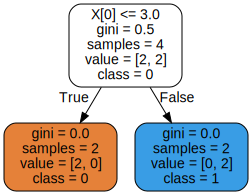

In [11]:
coordinadas = {
    'x' : [1, 2, 4, 5],
    'y' : [0, 0, 1, 1],
}
  
# crear Dataframe 
small_df = pd.DataFrame(coordinadas)

classifier.fit(small_df["x"].values.reshape(-1, 1), small_df["y"])

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(classifier, filled=True, rounded=True, proportion=False, class_names=['0', '1'])
graphviz.Source(dot_data)

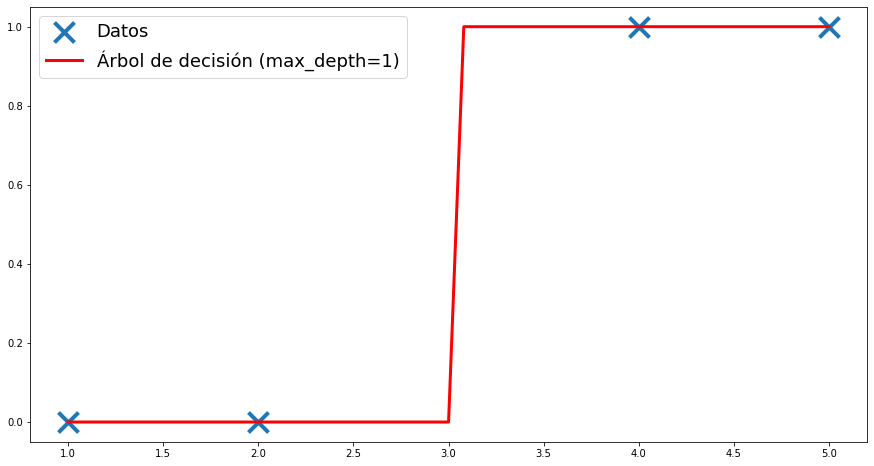

In [12]:
fig = plt.figure(figsize=(15, 8))
fig = plt.scatter(small_df["x"], small_df["y"], s=400, lw=4, label="Datos", marker="x")

x = np.linspace(1, 5, 51)
y_pred = classifier.predict(x.reshape(-1, 1))
fig = plt.plot(x, y_pred, lw=3, color="red", label="Árbol de decisión")

plt.legend(["Datos", "Árbol de decisión (max_depth=1)"], loc ="upper left", fontsize=18);

In [13]:
max_depth = 3

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=max_depth,random_state=0)
classifier.fit(X.reshape(-1, 1), y)

df["probability"]  = classifier.predict_proba(X.reshape(-1, 1))[:,1]
df["y_pred"]       = classifier.predict(X.reshape(-1, 1))

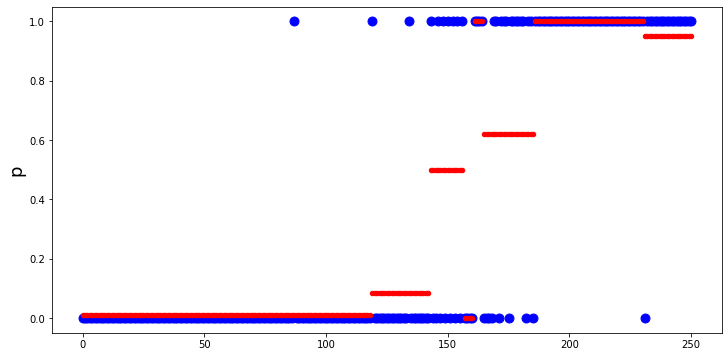

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(df.X, df.y_true, color="blue", s=80)
plt.scatter(df.X, df.probability, color="red",s=20)
ax.set_ylabel ("p", fontsize=18);

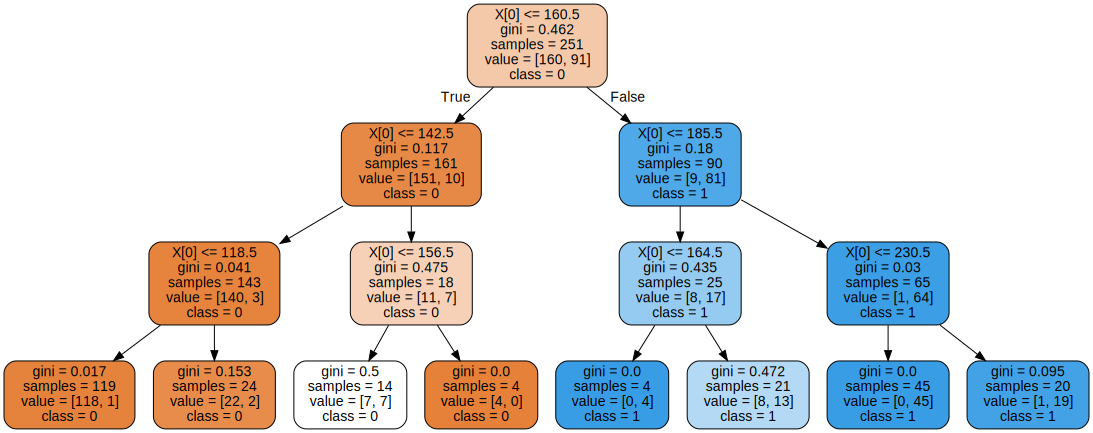

In [16]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(classifier, filled=True, rounded=True, proportion=False, class_names=['0', '1'])
graphviz.Source(dot_data)

In [17]:
df.loc[140:180, ["probability","y_pred"]].style.background_gradient(cmap='plasma', axis=None)

,probability,y_pred
140,0.083333,0
141,0.083333,0
142,0.083333,0
143,0.500000,0
144,0.500000,0
145,0.500000,0
146,0.500000,0
147,0.500000,0
148,0.500000,0
149,0.500000,0


## Métricas

In [18]:
accuracy_score(df["y_true"], df["y_pred"])

0.9243027888446215

### Matriz de confusión

[`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

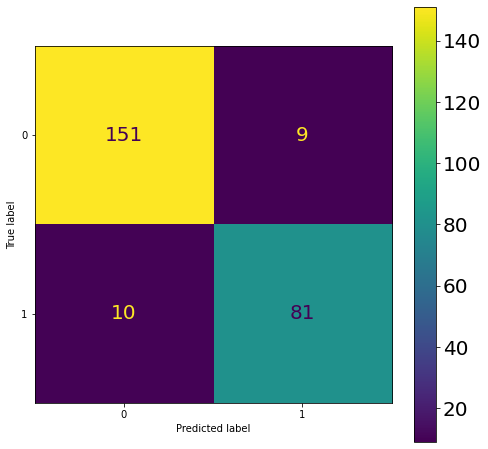

In [19]:
from sklearn.metrics import confusion_matrix
matriz_de_confusion = confusion_matrix( df["y_true"], df["y_pred"] )

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_de_confusion, display_labels=classifier.classes_)
fig, ax = plt.subplots(figsize=(8,8))
plt.rcParams.update({'font.size': 20})
disp.plot(ax=ax);

In [20]:
tn, fp, fn, tp = confusion_matrix(df["y_true"], df["y_pred"]).ravel()
print("Number of true negatives  (tn) = ",tn)
print("Number of true positives  (tp) = ",tp)
print("Number of false negatives (fn) = ",fn)
print("Number of false positives (fp) = ",fp)
print("Precision                                          = tp / (tp + fp) =", tp / (tp + fp))
print("Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) =", tp / (tp + fn))
print("Specificity             (aka. true negative rate)  = tn / (tn + fp) =", tn / (tn + fp))
print("Fall out                (aka. false positive rate) = fp / (fp + tn) =", fp / (fp + tn))
print("Miss rate               (aka. false negative rate) = fn / (fn + tp) =", fn / (fn + tp))

Number of true negatives  (tn) =  151
Number of true positives  (tp) =  81
Number of false negatives (fn) =  10
Number of false positives (fp) =  9
Precision                                          = tp / (tp + fp) = 0.9
Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) = 0.8901098901098901
Specificity             (aka. true negative rate)  = tn / (tn + fp) = 0.94375
Fall out                (aka. false positive rate) = fp / (fp + tn) = 0.05625
Miss rate               (aka. false negative rate) = fn / (fn + tp) = 0.10989010989010989


# $F_1$ score

# Anexo I: Red neuronal: una sola neurona

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1))

import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense    
from keras import optimizers

n_neurons   = 1

#===========================================================================
# keras model
#===========================================================================
model = Sequential()       
# input layer
model.add(Dense(n_neurons, input_dim=1, activation='sigmoid'))

optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.3)
model.compile(loss='binary_crossentropy', optimizer=optimizer)

#===========================================================================
# train the model
#===========================================================================
model.fit(X_scaled.reshape(-1, 1), y, epochs=2000, verbose=0)
df["y_NN"]  = model.predict(X_scaled.reshape(-1, 1))

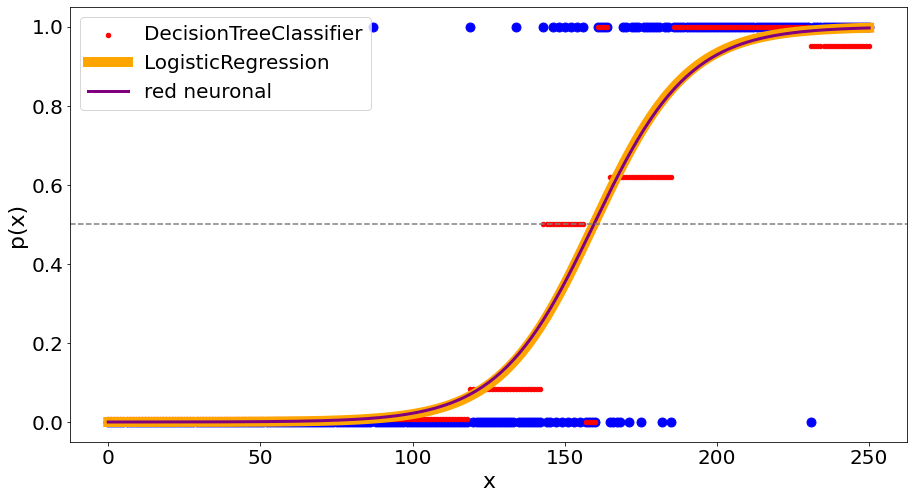

In [22]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.scatter(df.X, df.y_true, color="blue", s=80)
plt.scatter(df.X, df.probability, color="red",s=20, label='DecisionTreeClassifier')
plt.plot(df.X,    df.logistic, color="orange", lw = 10, label='LogisticRegression')
plt.plot(df.X,    df["y_NN"], lw=3,  color="purple",label='red neuronal')
plt.axhline(y=0.5, color='grey', linestyle='--')
ax.set_ylabel ("p(x)", fontsize=22)
ax.set_xlabel ("x", fontsize=22)
plt.legend(loc='upper left', fontsize=20);